In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Input-output properties cells

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rootFolder = '/home/fernando/S1_netpyne/sim/'
# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/S1_netpyne/sim/


In [4]:
# !nrnivmodl mod

In [5]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

## Netpyne

In [6]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [7]:
%matplotlib inline

In [8]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 2500.0 						            # Duration of the simulation, in ms
cfg.dt = 0.025								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.1 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1234, 'stim': 1234, 'loc': 1234} 
cfg.hParams = {'celsius': 34, 'v_init': -70.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

cfg.analysis['plotTraces'] = {'include': [i for i in range(1)], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [1400,2500], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [9]:
# for i,metype in enumerate(folder):
#     print(i,metype)

In [10]:
#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
for cellnumber in [760]:
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

NEURON: morphology_0fb1ca4724 : a template cannot be redefined
 in morphology.hoc near line 34
 begintemplate morphology_0fb1ca4724
                                   ^
        xopen("morphology.hoc")
      execute1("{xopen("mo...")
    load_file("morphology.hoc")
  xopen("template.hoc")
NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")
      execute1("{xopen("bi...")
    load_file("biophysics.hoc")
  xopen("template.hoc")
NEURON: synapses_0fb1ca4724 : a template cannot be redefined
 in synapses.hoc near line 31
 begintemplate synapses_0fb1ca4724                
                                 ^
        xopen("synapses.hoc")
      execute1("{xopen("sy...")
    load_file("synapses/s...")
  xopen("template.hoc")


	0 
	0 
	0 
cADpyr232_L5_TTPC1_0fb1ca4724[0]


In [11]:
for cellnumber in [760]:
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

L5_TTPC1_cADpyr232_1 all soma_0
L5_TTPC1_cADpyr232_1 somatic soma_0


In [12]:
# create custom list of spike times
spkTimes = [1500,2100]
netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

spkTimes2 = [1700,2125]
netParams.popParams['presyn2'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes2}  # VecStim with spike times

spkTimes3 = [1900,2150]
netParams.popParams['presyn3'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes3}  # VecStim with spike times


In [13]:
netParams.cellParams.keys()

odict_keys(['L5_TTPC1_cADpyr232_1'])

In [14]:
list(netParams.popParams.keys())[0:-1]

['L5_TTPC1_cADpyr232_1', 'presyn', 'presyn2']

In [15]:
#E2 -> syn 123
netParams.synMechParams['L5_TTPC:L5_TTPC'] = {'mod': 'DetAMPANMDA',
                                          'Dep': 671.0,
                                          'Fac': 17.0,
                                          'Use': 0.5,
                                          'tau_r_AMPA': 0.2,
                                          'tau_d_AMPA': 1.74,
                                          'NMDA_ratio': 0.4,
                                          'tau_r_NMDA': 0.29,
                                          'tau_d_NMDA': 43.0}

#I2 -> syn 9 
netParams.synMechParams['MC:PC'] = {'mod': 'DetGABAAB',
                                          'Dep': 1250.0,
                                          'Fac': 2.0,
                                          'Use': 0.30,
                                          'tau_d_GABAA': 8.3, 
                                          'tau_r_GABAA': 0.2, 
                                          'tau_d_GABAB': 260.9,
                                          'tau_r_GABAB': 3.5,       
                                            }

In [16]:
## Cell connectivity rules
netParams.connParams['pre->post'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': 'L5_TTPC1_cADpyr232_1'},
        'sec': 'basal',                  # target postsyn section
        'synMech': 'L5_TTPC:L5_TTPC',              # target synaptic mechanism
        'weight': 1.50,                 # synaptic weight 
        'synsPerConn': 5,
        'delay': 0.1}      


netParams.connParams['pre->post2'] = { 
        'preConds': {'pop': 'presyn2'},
        'postConds': {'pop': 'L5_TTPC1_cADpyr232_1'},
        'sec': 'basal',                  # target postsyn section
        'synMech': 'L5_TTPC:L5_TTPC',              # target synaptic mechanism
        'weight': 1.50,                 # synaptic weight 
        'synsPerConn': 10,
        'delay': 0.1}      


netParams.connParams['pre->post3'] = { 
        'preConds': {'pop': 'presyn3'},
        'postConds': {'pop': 'L5_TTPC1_cADpyr232_1'},
        'sec': 'basal',                  # target postsyn section
        'synMech': 'MC:PC',              # target synaptic mechanism
        'weight': 0.75,                 # synaptic weight 
        'synsPerConn': 20,
        'delay': 0.1}  

In [17]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2022-06-08 15:40:47.748907

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 4 
  Done; cell creation time = 0.06 s.
Making connections...
  Number of connections on node 0: 3 
  Number of synaptic contacts on node 0: 35 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0


{spkt: Vector[4634], spkid: Vector[4635], V_soma: {cell_0: Vector[4636]}, t: Vector[4637], _repr_mimebundle_: {}}

In [18]:
sim.runSim()                      			# run parallel Neuron simulation  

0.0s

Running simulation using NEURON for 2500.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
  Done; run time = 16.89 s; real-time ratio: 0.15.



Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 4
  Connections: 3 (0.75 per cell)
  Synaptic contacts: 35 (8.75 per cell)
  Spikes: 6 (0.60 Hz)
  Simulated time: 2.5 s; 1 workers
  Run time: 16.89 s
Plotting recorded cell traces ... trace


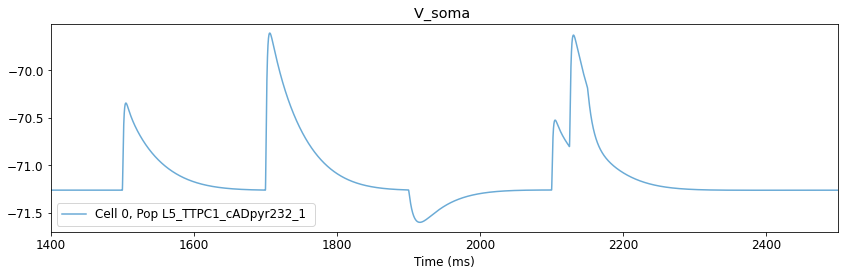

  Done; plotting time = 0.20 s

Total time = 17.18 s


In [19]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Preparing spike data...
Plotting raster...


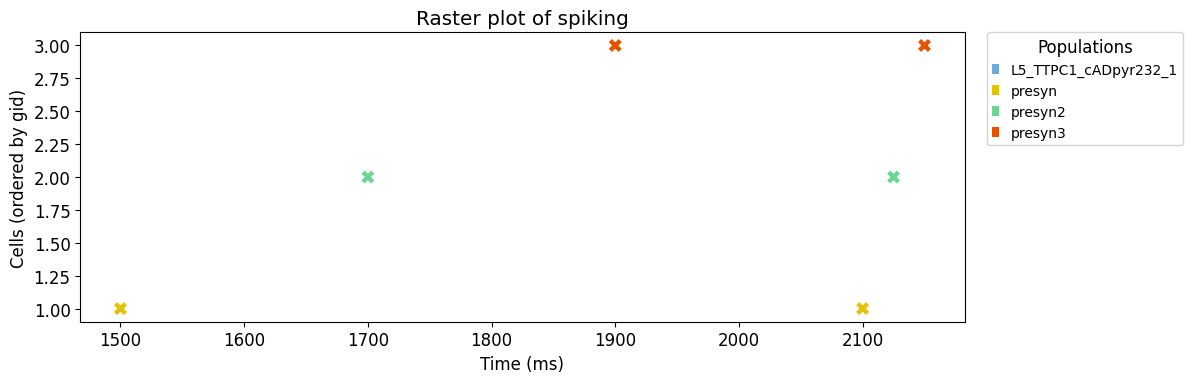

In [20]:
sim.analysis.plotRaster(
    include=['allCells'],
    timeRange=None,
    maxSpikes=100000000.0,
    orderBy='gid',
    orderInverse=False,
    labels='legend',
    popRates=False,
    spikeHist=None,
    spikeHistBin=5,
    syncLines=False,
    lw=10,
    marker='x',
    markerSize=10,
    popColors=None,
    figSize=(12,4),
    fontSize=12,
    dpi=100,
    saveData=None,
    saveFig=None,
    showFig=True
)

Plotting recorded cell traces ... trace


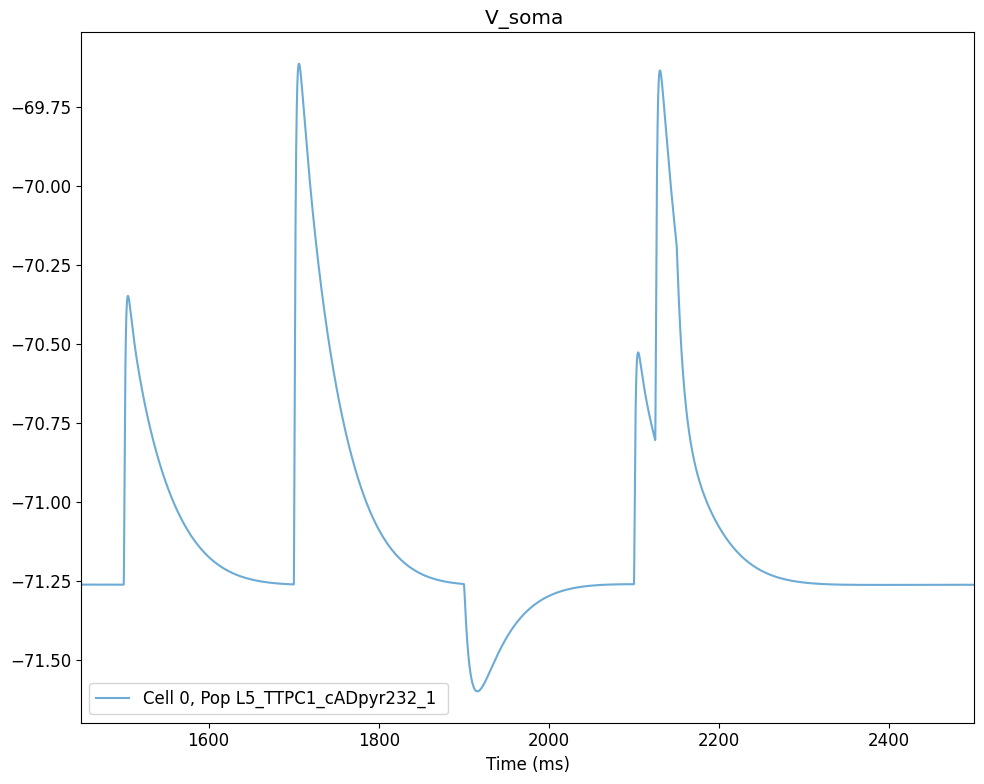

In [21]:
Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[1450,2500])

In [22]:
sim.net.allCells[0]['conns']

[{preGid: 1, sec: 'dend_11', loc: 0.5457350848814457, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post'},
 {preGid: 1, sec: 'dend_33', loc: 0.3804155939589259, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post'},
 {preGid: 1, sec: 'dend_53', loc: 0.010652946418697877, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post'},
 {preGid: 1, sec: 'dend_72', loc: 0.6205529614693385, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post'},
 {preGid: 1, sec: 'dend_99', loc: 0.5411553893742632, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post'},
 {preGid: 2, sec: 'dend_6', loc: 0.19763106862433671, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post2'},
 {preGid: 2, sec: 'dend_16', loc: 0.9098121000321562, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay: 0.1, label: 'pre->post2'},
 {preGid: 2, sec: 'dend_27', loc: 0.4015561705871295, synMech: 'L5_TTPC:L5_TTPC', weight: 1.5, delay

In [23]:
sim.net.allCells[0]['tags']['pop'] + '_' + sim.net.allCells[0]['conns'][3]['sec']

'L5_TTPC1_cADpyr232_1_dend_72'

In [24]:
# alltraces = []
# for number in range(25):
#     alltraces.append(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])


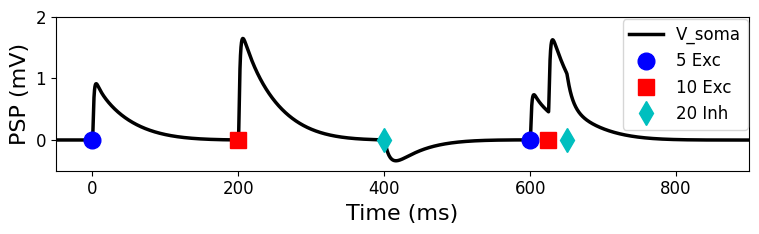

In [31]:
figSize = (7.75,2.5)
fig = plt.figure(figsize=figSize)  # Open a new figure
clr = ["black", "blue","green","gray", "red"]
number=0
for i in range(1):
    for number2 in range(i,5,5):
        plt.plot(Traces2[1]['tracesData'][number]['t'][1:],Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][0]-1.0*i, label= 'V_soma', linewidth=2.5, color=clr[i])
        number+=1

plt.plot(spkTimes,[0,0],'bo',markersize = 12.0 , label = '5 Exc')
plt.plot(spkTimes2,[0,0],'rs',markersize = 12.0, label = '10 Exc')
plt.plot(spkTimes3,[0,0],'cd',markersize = 12.0, label = '20 Inh')

plt.legend(loc='upper right', bbox_to_anchor=(1.01, 1.04))
plt.xlim(1450,2400)
plt.ylim(-0.5,2.0)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('PSP (mV)', fontsize=16)
plt.xticks(range(1500,2500,200), range(0,1000,200), fontsize=12);
plt.yticks([0,1,2], fontsize=12);
plt.ion()
plt.tight_layout()

plt.savefig('../info/syn_L5TTPC.png', facecolor = 'white' , dpi=300)
 